### **IMPORT LIBRARY**

In [16]:
import wfdb as wf
from wfdb import processing

import neurokit2 as ECG
import librosa as mi


import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, ifft
import numpy as np

### **PRE PROCESSING**

{'fs': 500, 'sig_len': 10000, 'n_sig': 2, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV'], 'sig_name': ['ECG I', 'ECG I filtered'], 'comments': ['Age: 25', 'Sex: male', 'ECG date: 26.04.2005']}


Text(0.5, 1.0, 'Filtered Signal')

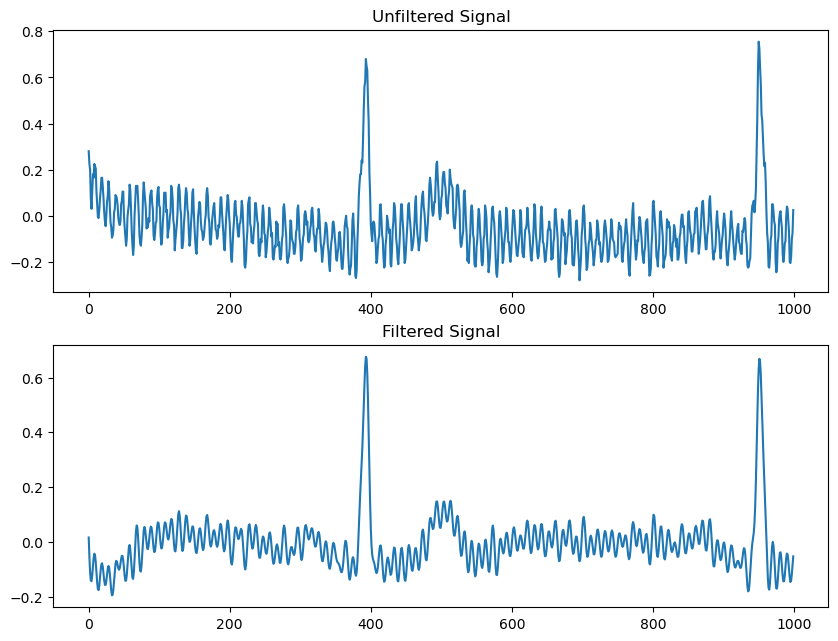

In [19]:
signal_array, fields = wf.rdsamp( '/home/senume/Project/Research/sip-person_identification/DATASET/ECG-ID/Person_01/rec_18')
sig = signal_array[:,0]

# For single channel
sos = signal.butter(6, [2, 50], btype='bandpass', fs=fields['fs'], analog= False)
filtered = signal.filtfilt(sos[0], sos[1], sig)
print(fields)

plt.figure(figsize = (10,7.5), dpi = 100)

plt.subplot(2,1,1)
plt.plot(sig[:1000])
plt.title('Unfiltered Signal')

plt.subplot(2,1,2)
plt.plot(filtered[:1000])
plt.title('Filtered Signal')

#### **T PEAK DECTECTION**

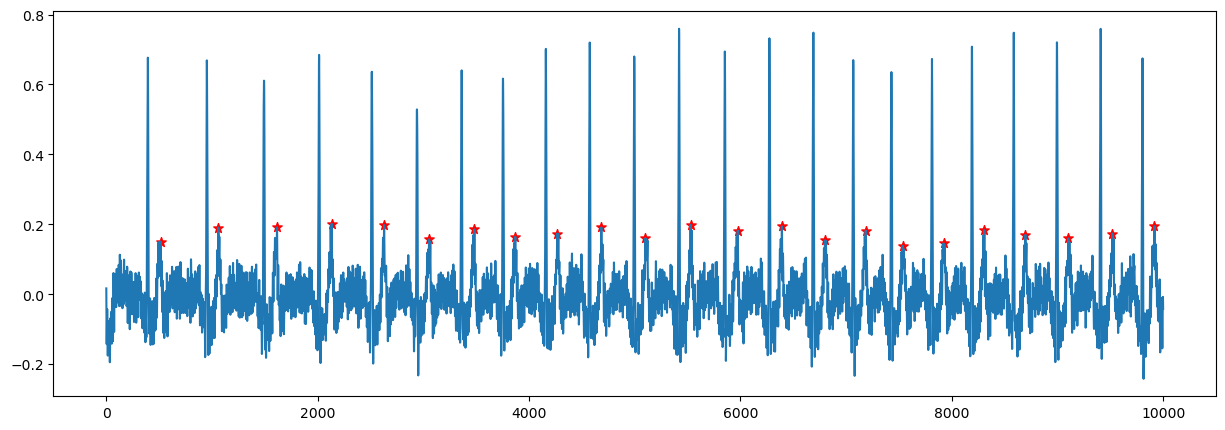

In [20]:
_, rpeaks = ECG.ecg_peaks(filtered, sampling_rate=fields['fs'])
_, waves_peak = ECG.ecg_delineate(filtered, rpeaks, sampling_rate=1000, method="peak")

plt.figure(figsize = (15,5), dpi = 100)
plt.scatter(waves_peak['ECG_T_Peaks'], filtered[waves_peak['ECG_T_Peaks']], color = 'red', s =50, marker = "*") 
plt.plot(filtered)


#### **SEGMENTATION**

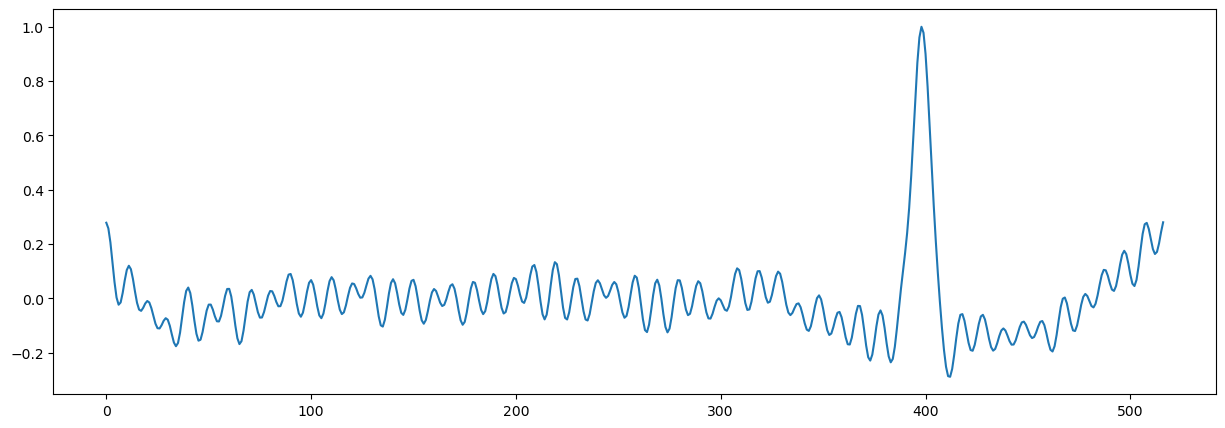

In [21]:
Ind = waves_peak['ECG_T_Peaks']

n = 2
segment = filtered[Ind[n]:Ind[n+1]]

segment_n = segment/np.max(np.abs(segment))


plt.figure(figsize = (15,5), dpi = 100)
plt.plot(segment_n)

### **FEATURE EXTRACTION**

#### **CEPSTRAL COEFFICIENTS**

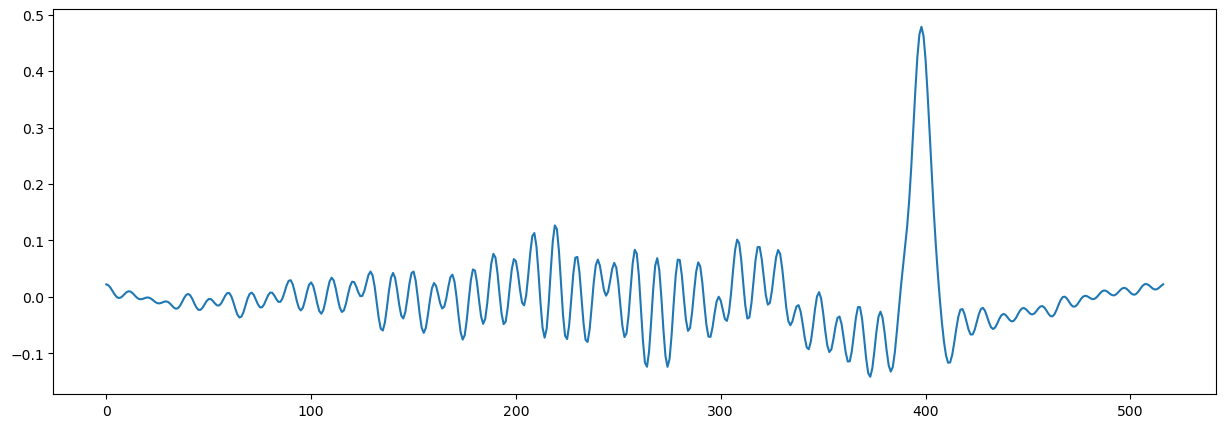

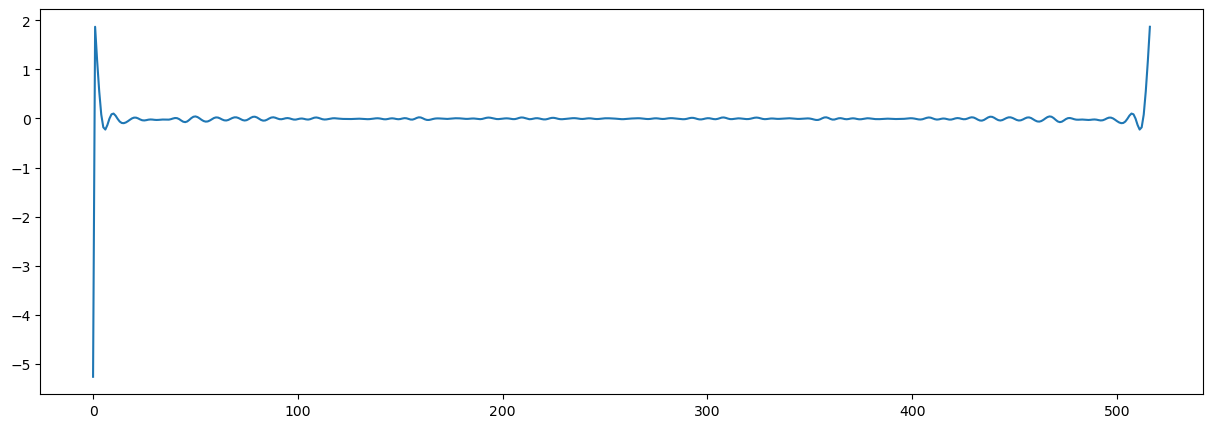

In [ ]:
win = signal.windows.hamming(len(segment_n))
win_segment = np.multiply(segment_n, win)

plt.figure(figsize = (15,5), dpi = 100)
plt.plot(win_segment)

fft_c = fft(win_segment,len(win_segment))
log_fft_c = np.log(np.abs(fft_c))
cc= ifft(log_fft_c)

plt.figure(figsize = (15,5), dpi = 100)
plt.plot(np.real(cc))

#### **ENTROPY**

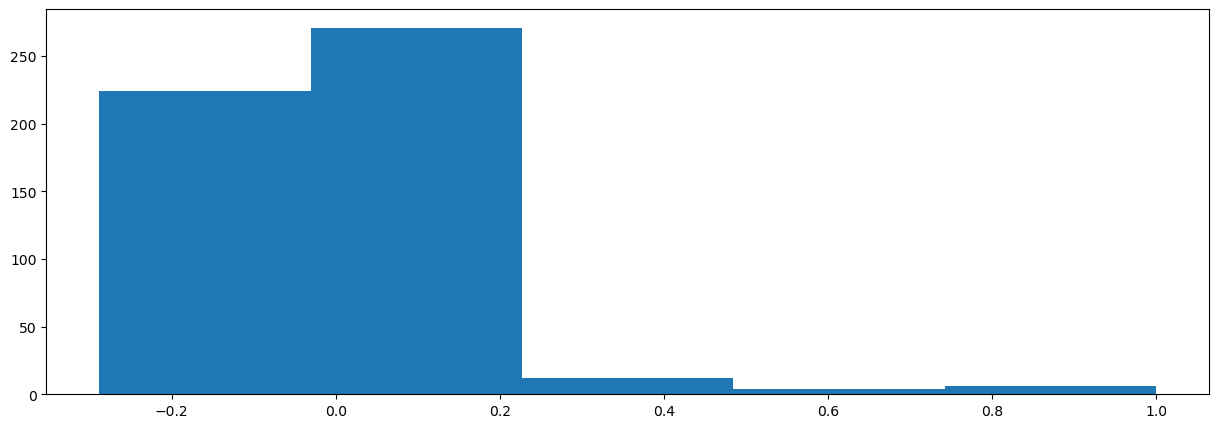

In [23]:
ll = min(segment_n)
ul = max(segment_n)

plt.figure(figsize = (15,5), dpi = 100)
counts, bins, bars = plt.hist(segment_n,np.linspace(ll,ul,6))

P_x = counts/sum(counts)

entropy = sum(np.multiply(P_x,np.log2(P_x)))

#### **ZERO CROSSING RATE**

In [ ]:
np.sum(mi.zero_crossings(segment_n).astype(float))

67.0